In [5]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [6]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [7]:
analysis = scripts.Analysis()

In [8]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03a_wn_540_620',
                          'ng_7',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_7',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.7_.7_.7_.5_.5_.5_.5',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_0f8bc9f',
                          'atmpro_saw')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [9]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03a_wn_540_620',
                          'ng_7',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_7',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.7_.7_.7_.5_.5_.5_.5',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_0f8bc9f',
                          'atmpro_saw')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [10]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [11]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [12]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [13]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [14]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 540

nband = 80

nv = 200

dv = 0.005

tsfc = 257.0

ng = 7

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 7 /)

data wgt
     &     /3*.7, 4*.5/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 6.375563e-24

include 'saw75.pro'


In [15]:
fig.display_hrefanchor()

In [16]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [17]:
table_dgdgs.display_hrefanchor()

In [18]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [19]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [20]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

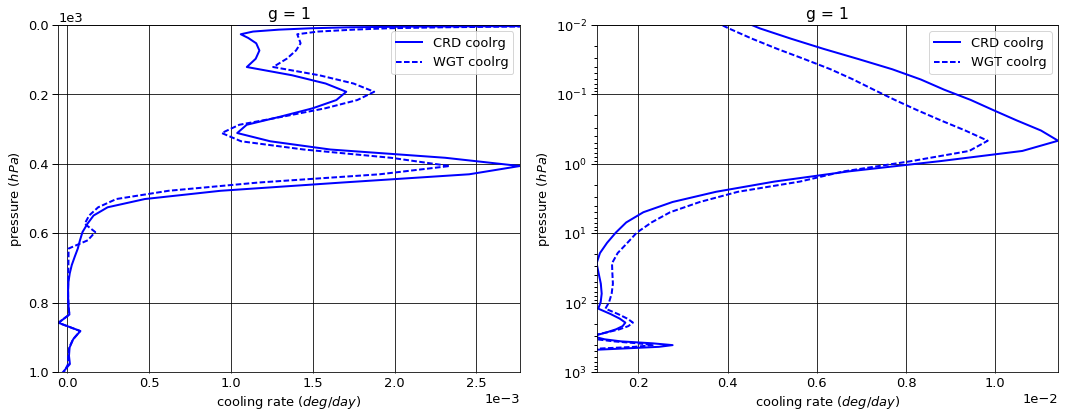

# Figure: cooling rate g-group 2

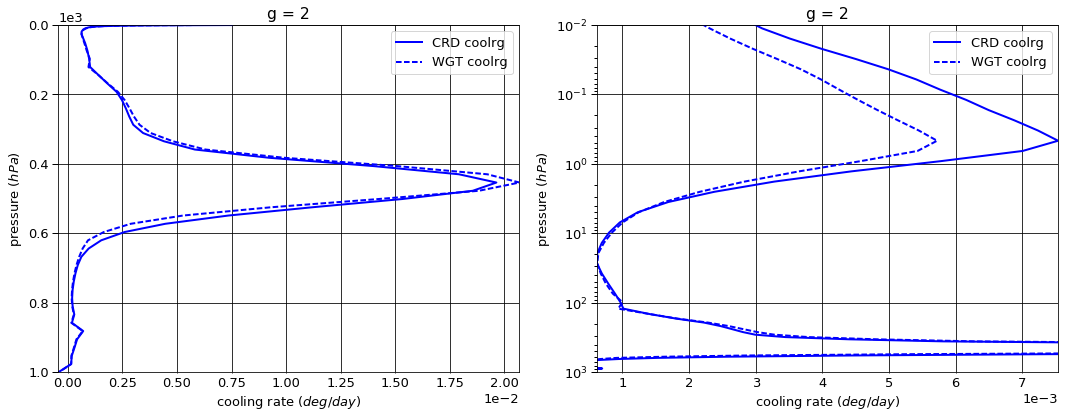

# Figure: cooling rate g-group 3

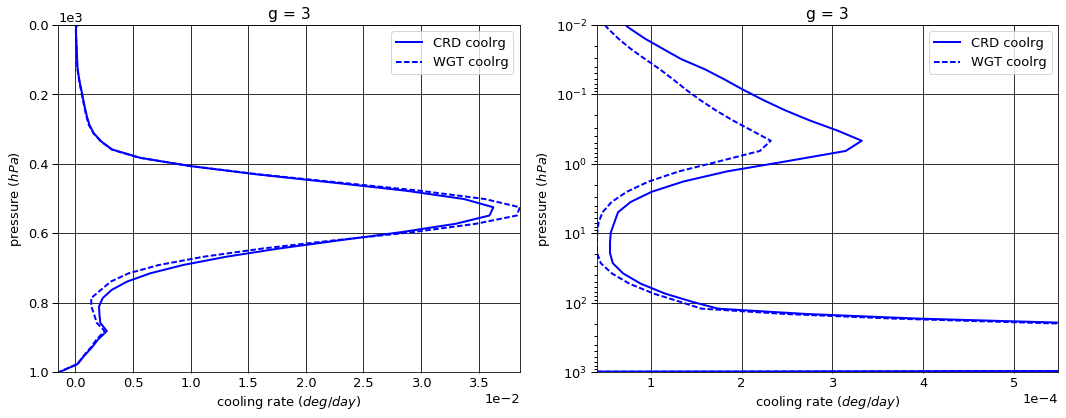

# Figure: cooling rate g-group 4

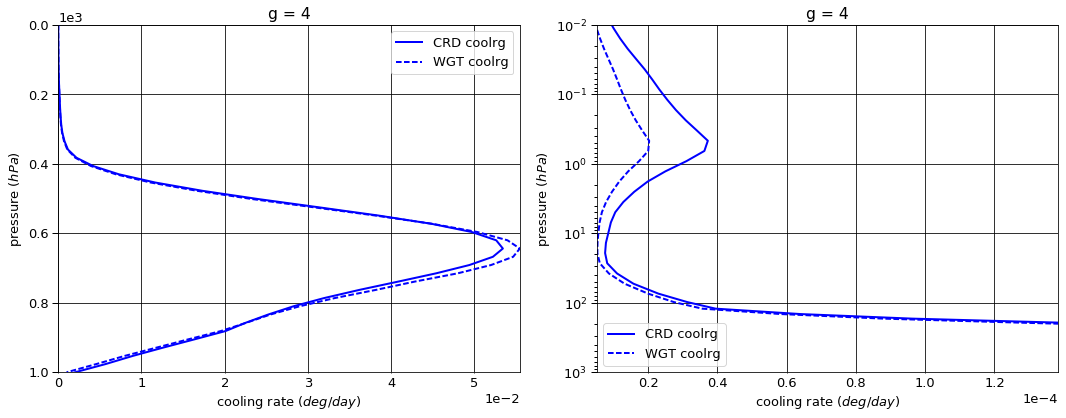

# Figure: cooling rate g-group 5

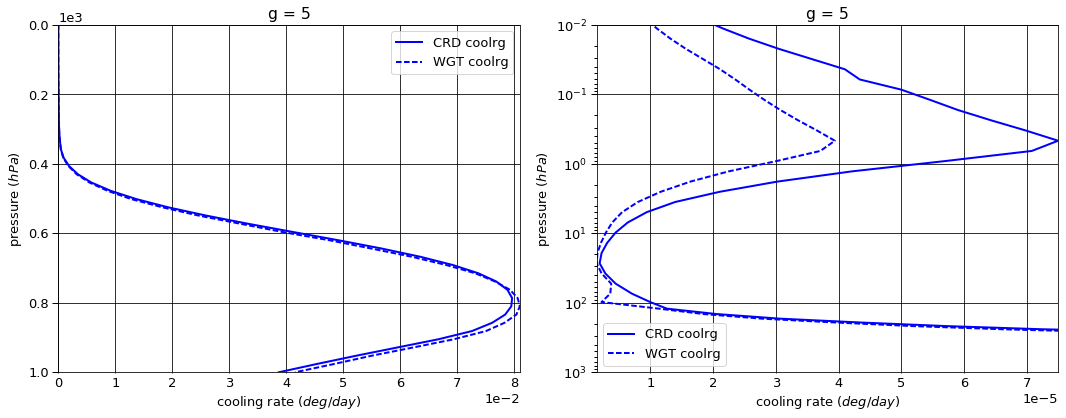

# Figure: cooling rate g-group 6

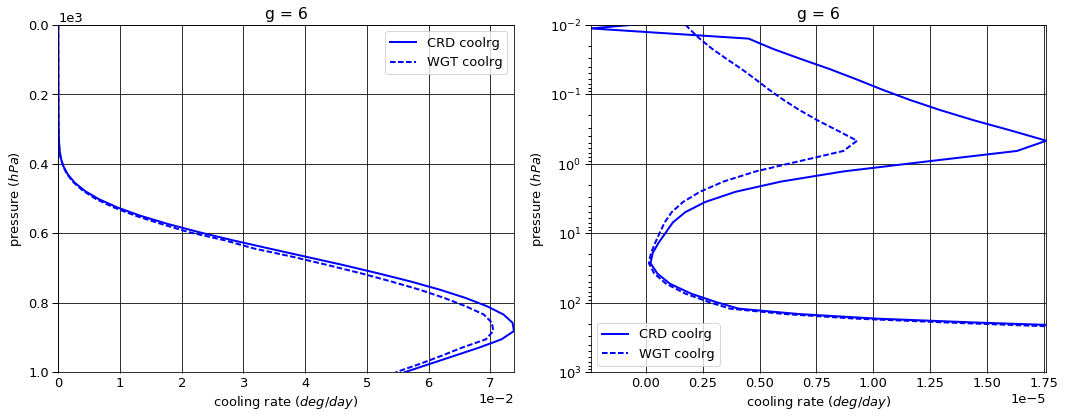

# Figure: cooling rate g-group 7

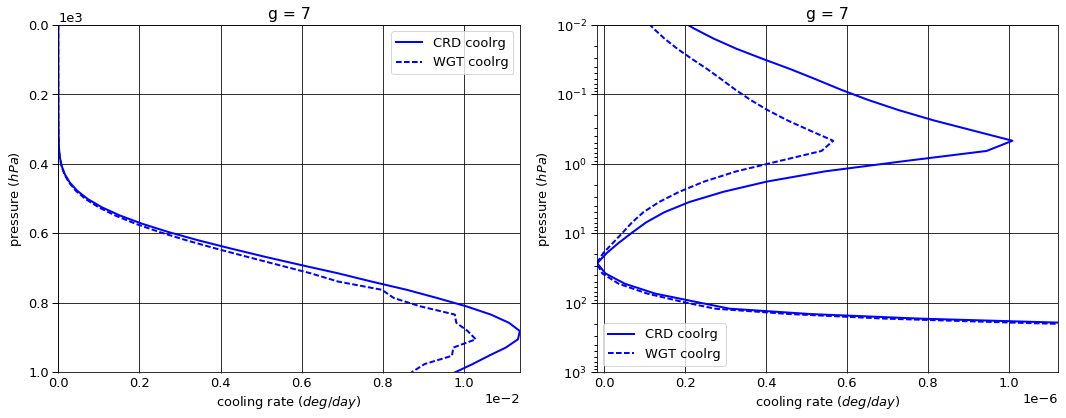

# Figure: cooling rate g-group total

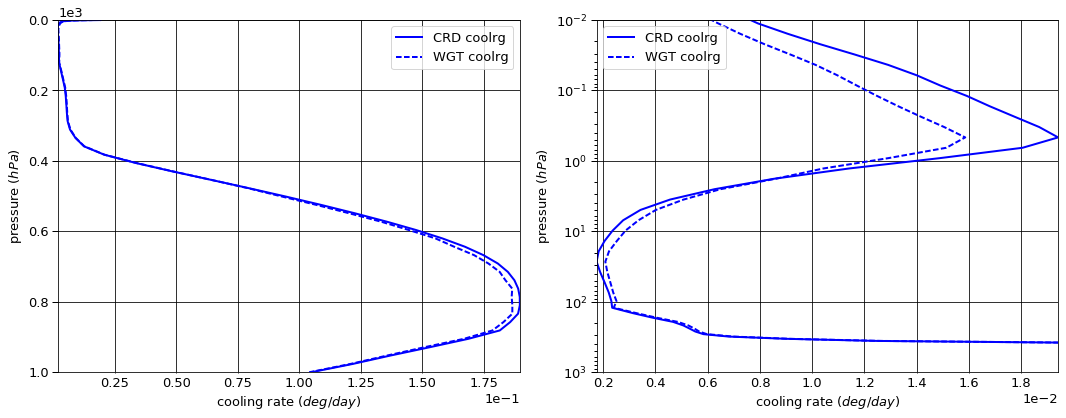

In [21]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [22]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.092919  0.000000 -0.092919
  1013.0   76    -0.160204  0.160311  0.000108
2 0.0      1     -0.454958  0.000000 -0.454958
  1013.0   76    -0.676300  0.678007  0.001707
3 0.0      1     -0.988074  0.000000 -0.988074
  1013.0   76    -1.254869  1.262640  0.007771
4 0.0      1     -2.107202  0.000000 -2.107202
  1013.0   76    -2.360151  2.334352 -0.025799
5 0.0      1     -5.134774  0.000000 -5.134774
  1013.0   76    -5.318812  3.770275 -1.548536
6 0.0      1     -9.733383  0.000000 -9.733383
  1013.0   76    -9.823956  3.117218 -6.706738
7 0.0      1     -3.986688  0.000000 -3.986688
  1013.0   76    -3.996846  0.451292 -3.545554


WGT


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.090856  0.000000 -0.090856
  1013.0   76    -0.160204  0.160273  0.000070
2 0.0      1     -0.447863  0.000000 -0.447863
  1013.0   76    -0.676300  0.677859  0.001559
3 0.0      1     -0.981974  0.000000 -0.981974
  1013.0   76    -1.254869  1.262205  0.007336
4 0.0      1     -2.106723  0.000000 -2.106723
  1013.0   76    -2.360151  2.359952 -0.000199
5 0.0      1     -5.142879  0.000000 -5.142879
  1013.0   76    -5.318812  3.787288 -1.531524
6 0.0      1     -9.738925  0.000000 -9.738925
  1013.0   76    -9.823956  2.970793 -6.853163
7 0.0      1     -3.987322  0.000000 -3.987322
  1013.0   76    -3.996846  0.406586 -3.590260


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.002063  0.000000  0.002063
  1013.0   76     0.000000 -0.000038 -0.000038
2 0.0      1      0.007095  0.000000  0.007095
  1013.0   76     0.000000 -0.000147 -0.000147
3 0.0      1      0.006100  0.000000  0.006100
  1013.0   76     0.000000 -0.000435 -0.000436
4 0.0      1      0.000479  0.000000  0.000479
  1013.0   76     0.000000  0.025600  0.025600
5 0.0      1     -0.008106  0.000000 -0.008106
  1013.0   76     0.000000  0.017012  0.017012
6 0.0      1     -0.005542  0.000000 -0.005542
  1013.0   76     0.000000 -0.146425 -0.146425
7 0.0      1     -0.000634  0.000000 -0.000634
  1013.0   76     0.000000 -0.044706 -0.044706

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1      1.045584e-03
  1001.112500 75    -2.639566e-05
2 0.000312    1      7.301375e-04
  1001.112500 75    -4.434489e-04
3 0.000312    1      9.660354e-06
  1001.112500 75    -1.428378e-03
4 0.000312    1      1.389667e-06
  1001.112500 75     2.024261e-03
5 0.000312    1      1.334622e-06
  1001.112500 75     3.869727e-02
6 0.000312    1     -4.394984e-09
  1001.112500 75     5.607835e-02
7 0.000312    1     -6.310284e-09
  1001.112500 75     9.779806e-03


WGT


coolrg
g pressure    layer              
1 0.000312    1      1.198961e-03
  1001.112500 75    -2.023628e-05
2 0.000312    1      6.369461e-04
  1001.112500 75    -4.258109e-04
3 0.000312    1      6.562054e-06
  1001.112500 75    -1.484615e-03
4 0.000312    1      5.471454e-07
  1001.112500 75     1.002727e-03
5 0.000312    1      4.623138e-07
  1001.112500 75     4.155898e-02
6 0.000312    1     -1.654723e-08
  1001.112500 75     5.464303e-02
7 0.000312    1     -7.457062e-09
  1001.112500 75     8.703683e-03


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.533766e-04
  1001.112500 75     6.159381e-06
2 0.000312    1     -9.319138e-05
  1001.112500 75     1.763799e-05
3 0.000312    1     -3.098300e-06
  1001.112500 75    -5.623700e-05
4 0.000312    1     -8.425220e-07
  1001.112500 75    -1.021534e-03
5 0.000312    1     -8.723082e-07
  1001.112500 75     2.861712e-03
6 0.000312    1     -1.215225e-08
  1001.112500 75    -1.435325e-03
7 0.000312    1     -1.146778e-09
  1001.112500 75    -1.076124e-03

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-22.497997,0.000000,-22.497997
1013.0,76,-23.591138,11.774097,-11.817041



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-22.496542,0.000000,-22.496542
1013.0,76,-23.591138,11.624957,-11.966181



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.001455,0.00000,0.001455
1013.0,76,0.000000,-0.14914,-0.149140


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.001788
1001.112500,75,0.104681



WGT


,,coolrg
pressure,layer,
0.000312,1,0.001843
1001.112500,75,0.103978



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000055
1001.112500,75,-0.000704


In [23]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.006750,0.006798
2,0.028563,0.028687
3,0.053000,0.053233
4,0.099562,0.100153
5,0.224750,0.225604
6,0.416125,0.416491
7,0.171250,0.169035


In [24]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,7.643251e-21
2,1.773812e-21
3,4.116584e-22
4,9.553585e-23
5,2.217154e-23
6,5.145472e-24
7,1.194138e-24


In [25]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [7]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [26]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,7.643251e-21,NaN,0.006750,0.006798,0.006750,0.006798,600.0
2,1.773812e-21,0.232076,0.028563,0.028687,0.035313,0.035485,600.0
3,4.116584e-22,0.232076,0.053000,0.053233,0.088313,0.088718,600.0
4,9.553585e-23,0.232076,0.099562,0.100153,0.187875,0.188871,600.0
5,2.217154e-23,0.232076,0.224750,0.225604,0.412625,0.414475,600.0
6,5.145472e-24,0.232076,0.416125,0.416491,0.828750,0.830965,600.0
7,1.194138e-24,0.232076,0.171250,0.169035,1.000000,1.000000,600.0


In [27]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [28]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  1.140106e-20  5.443034e-22  20.946155
      2     0.000312  1.706029e-21  3.551855e-23  48.032064
      3     0.000312  1.370940e-23  1.331799e-24  10.293890
      4     0.000312  1.483487e-24  1.997350e-25   7.427276
      5     0.000312  2.148874e-24  1.250037e-25  17.190487
      6     0.000312  1.651998e-25  1.682592e-26   9.818175
      7     0.000312  3.556451e-26  4.255555e-27   8.357196
2     1     0.000750  1.171315e-20  5.469618e-22  21.414930
      2     0.000750  1.750213e-21  3.560839e-23  49.151707
      3     0.000750  1.455673e-23  1.349308e-24  10.788298
      4     0.000750  1.546642e-24  2.033031e-25   7.607566
      5     0.000750  2.206738e-24  1.267601e-25  17.408778
      6     0.000750  1.720753e-25  1.723165e-26   9.986002
      7     0.000750  3.635016e-26  4.345531e-27   8.364953
3     1     0.001052  1.236296e-20  5.519739e-22  22.397730
      2     0.001052  1.842335e-21  3.576478e-23  51.512546
      3     0.001052  1.641001e-23  1.382762e-24  11.867559
      4     0.001052  1.680669e-24  2.105120e-25   7.983722
      5     0.001052  2.328757e-24  1.303857e-25  17.860533
      6     0.001052  1.869012e-25  1.804144e-26  10.359552
      7     0.001052  3.800614e-26  4.540779e-27   8.369961
4     1     0.001476  1.304846e-20  5.569704e-22  23.427575
      2     0.001476  1.939600e-21  3.593065e-23  53.981775
      3     0.001476  1.850008e-23  1.417809e-24  13.048356
      4     0.001476  1.826190e-24  2.181106e-25   8.372770
      5     0.001476  2.459788e-24  1.342333e-25  18.324723
      6     0.001476  2.033266e-25  1.885927e-26  10.781252
      7     0.001476  3.979720e-26  4.763072e-27   8.355364
5     1     0.002070  1.376227e-20  5.619392e-22  24.490680
      2     0.002070  2.041003e-21  3.610973e-23  56.522247
      3     0.002070  2.082584e-23  1.454543e-24  14.317792
      4     0.002070  1.982149e-24  2.260596e-25   8.768257
      5     0.002070  2.598966e-24  1.382541e-25  18.798472
      6     0.002070  2.213343e-25  1.966850e-26  11.253238
      7     0.002070  4.172219e-26  5.011900e-27   8.324626
6     1     0.002904  1.450504e-20  5.669287e-22  25.585294
      2     0.002904  2.146680e-21  3.630835e-23  59.123577
      3     0.002904  2.340995e-23  1.493380e-24  15.675818
      4     0.002904  2.149163e-24  2.344201e-25   9.167997
      5     0.002904  2.747006e-24  1.424373e-25  19.285717
      6     0.002904  2.411084e-25  2.046359e-26  11.782309
      7     0.002904  4.380471e-26  5.287426e-27   8.284694
7     1     0.004074  1.527743e-20  5.719890e-22  26.709314
      2     0.004074  2.256770e-21  3.653437e-23  61.771139
      3     0.004074  2.627700e-23  1.534775e-24  17.121074
      4     0.004074  2.327907e-24  2.432708e-25   9.569200
      5     0.004074  2.904726e-24  1.467794e-25  19.789743
      6     0.004074  2.628590e-25  2.124263e-26  12.374126
      7     0.004074  4.607409e-26  5.587816e-27   8.245456
8     1     0.005714  1.608030e-20  5.771866e-22  27.859792
      2     0.005714  2.371437e-21  3.679821e-23  64.444350
      3     0.005714  2.945415e-23  1.579338e-24  18.649686
      4     0.005714  2.519161e-24  2.527178e-25   9.968275
      5     0.005714  3.073087e-24  1.513000e-25  20.311208
      6     0.005714  2.868308e-25  2.201043e-26  13.031586
      7     0.005714  4.856716e-26  5.909590e-27   8.218362
9     1     0.008015  1.691430e-20  5.826195e-22  29.031473
      2     0.008015  2.490814e-21  3.711399e-23  67.112535
      3     0.008015  3.297011e-23  1.627931e-24  20.252769
      4     0.008015  2.723755e-24  2.629038e-25  10.360272
      5     0.008015  3.253145e-24  1.560514e-25  20.846629
      6     0.008015  3.132972e-25  2.277994e-26  13.753205
      7     0.008015  5.132889e-26  6.248733e-27   8.214287
10    1     0.011243  1.778037e-20  5.884397e-22  30.216127
      2     0.011243  2.615068e-21  3.750145e-23  69

# Histogram of wavenumbers in g-group 1

In [29]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [30]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
